<a href="https://colab.research.google.com/github/kafeelkamran/CVD-Analysis/blob/main/CVD_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
from IPython.core.display import HTML
import matplotlib.pyplot as plt
from scipy.stats import uniform
import joblib


import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv('heart.csv')
print('Shape of the data is ', data.shape)

Shape of the data is  (303, 14)


In [ ]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

Note: From the data types we see that all features are int64/float64. But that is because some of the categorical features including the target (has disease/no disease) are already label encoded for us. We will, in the section below, see a detailed decreption of the features.

## 1.1 Data Dictionary
**age**: age in years
**sex:** sex

1 = male,
0 = female

**cp:** chest pain type

Value 0: typical angina,
Value 1: atypical angina,
Value 2: non-anginal pain,
Value 3: asymptomatic

**trestbps:** resting blood pressure (in mm Hg on admission to the hospital)

**chol:** serum cholestoral in mg/dl

**fbs:** (fasting blood sugar > 120 mg/dl)

1 = true;
0 = false

**restecg:** resting electrocardiographic results
Value 0: normal
Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

**thalach:** maximum heart rate achieved
**exang:** exercise induced angina
1 = yes
0 = no

oldpeak = ST depression induced by exercise relative to rest

**slope:** the slope of the peak exercise ST segment
Value 0: upsloping
Value 1: flat
Value 2: downsloping

**ca:** number of major vessels (0-3) colored by flourosopy
**thal:**
0 = error (in the original dataset 0 maps to NaN's)
1 = fixed defect
2 = normal
3 = reversable defect

**target (the lable):**
0 = no disease,
1 = disease

**Note on the target label:**
Diagnosis of heart disease (angiographic disease status)
Value 0: < 50% diameter narrowing
Value 1: > 50% diameter narrowing

**Notes from the discussion forum of the dataset:**
data #93, 159, 164, 165 and 252 have ca=4 which is incorrect. In the original Cleveland dataset they are NaNs.
data #49 and 282 have thal = 0, also incorrect. They are also NaNs in the original dataset.
Action: Drop the faulty data! (7 data entry will be dropped)



## 1.2 Data pre-processing
1.2.1 Drop faulty data

In [ ]:
data = data[data['ca'] < 4] #drop the wrong ca value
data = data[data['thal'] > 0] # drop the wong thal value
print(f'The length of the data now is {len(data)} instead of 303!')

The length of the data now is 296 instead of 303!


1.2.2 Rename columns for the sake of clarity

The feature names in the dataset are abbreviated and hard to understand their meaning. A full medical/technical name is hard enough to understand for most of us let alone their short form. So to make them a little bit easier to read we will, here under, change the column names of the data frame using information from the UCL data repository.

We'll also replace the coded categories (0, 1, 2,..) to their medical meaning ('atypical angina', 'typical angina', etc. for example)

Note: I borrowed Rob Harrand's idea of re-naming the columns.

In [ ]:
data = data.rename(
    columns = {'cp':'chest_pain_type',
               'trestbps':'resting_blood_pressure',
               'chol': 'cholesterol',
               'fbs': 'fasting_blood_sugar',
               'restecg' : 'resting_electrocardiogram',
               'thalach': 'max_heart_rate_achieved',
               'exang': 'exercise_induced_angina',
               'oldpeak': 'st_depression',
               'slope': 'st_slope',
               'ca':'num_major_vessels',
               'thal': 'thalassemia'},
    errors="raise")

In [ ]:
data['sex'][data['sex'] == 0] = 'female'
data['sex'][data['sex'] == 1] = 'male'

data['chest_pain_type'][data['chest_pain_type'] == 0] = 'typical angina'
data['chest_pain_type'][data['chest_pain_type'] == 1] = 'atypical angina'
data['chest_pain_type'][data['chest_pain_type'] == 2] = 'non-anginal pain'
data['chest_pain_type'][data['chest_pain_type'] == 3] = 'asymptomatic'

data['fasting_blood_sugar'][data['fasting_blood_sugar'] == 0] = 'lower than 120mg/ml'
data['fasting_blood_sugar'][data['fasting_blood_sugar'] == 1] = 'greater than 120mg/ml'

data['resting_electrocardiogram'][data['resting_electrocardiogram'] == 0] = 'normal'
data['resting_electrocardiogram'][data['resting_electrocardiogram'] == 1] = 'ST-T wave abnormality'
data['resting_electrocardiogram'][data['resting_electrocardiogram'] == 2] = 'left ventricular hypertrophy'

data['exercise_induced_angina'][data['exercise_induced_angina'] == 0] = 'no'
data['exercise_induced_angina'][data['exercise_induced_angina'] == 1] = 'yes'

data['st_slope'][data['st_slope'] == 0] = 'upsloping'
data['st_slope'][data['st_slope'] == 1] = 'flat'
data['st_slope'][data['st_slope'] == 2] = 'downsloping'

data['thalassemia'][data['thalassemia'] == 1] = 'fixed defect'
data['thalassemia'][data['thalassemia'] == 2] = 'normal'
data['thalassemia'][data['thalassemia'] == 3] = 'reversable defect'

In [ ]:
data.dtypes

age                            int64
sex                           object
chest_pain_type               object
resting_blood_pressure         int64
cholesterol                    int64
fasting_blood_sugar           object
resting_electrocardiogram     object
max_heart_rate_achieved        int64
exercise_induced_angina       object
st_depression                float64
st_slope                      object
num_major_vessels              int64
thalassemia                   object
target                         int64
dtype: object

In [ ]:
data.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_electrocardiogram,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,male,asymptomatic,145,233,greater than 120mg/ml,normal,150,no,2.3,upsloping,0,fixed defect,1
1,37,male,non-anginal pain,130,250,lower than 120mg/ml,ST-T wave abnormality,187,no,3.5,upsloping,0,normal,1
2,41,female,atypical angina,130,204,lower than 120mg/ml,normal,172,no,1.4,downsloping,0,normal,1
3,56,male,atypical angina,120,236,lower than 120mg/ml,ST-T wave abnormality,178,no,0.8,downsloping,0,normal,1
4,57,female,typical angina,120,354,lower than 120mg/ml,ST-T wave abnormality,163,yes,0.6,downsloping,0,normal,1


1.2.3 Grouping Features (by data type)

As we have seen above there are three datatypes i.e object, int and floats. Let's group them according to type.

In [ ]:
# numerical fearures 6
num_feats = ['age', 'cholesterol', 'resting_blood_pressure', 'max_heart_rate_achieved', 'st_depression', 'num_major_vessels']
# categorical (binary)
bin_feats = ['sex', 'fasting_blood_sugar', 'exercise_induced_angina', 'target']
# caterorical (multi-)
nom_feats= ['chest_pain_type', 'resting_electrocardiogram', 'st_slope', 'thalassemia']
cat_feats = nom_feats + bin_feats

## 1.3 Exploring Features

In this section we'll investigate all the features (including the target) in detail. We will look at the statistical summary when possible and the distributions of some of them as well, starting from the target.

1.3.1 Target distribution

We observe that the target is fairly balanced with ~46% with no heart disease and ~54% with heart disease. So no need to worry about target imbalance.

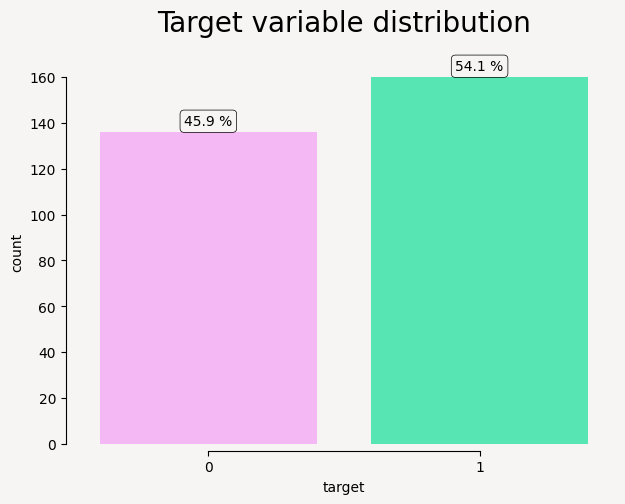

In [ ]:
mypal= ['#FC05FB', '#FEAEFE', '#FCD2FC','#F3FEFA', '#B4FFE4','#3FFEBA']

plt.figure(figsize=(7, 5),facecolor='#F6F5F4')
total = float(len(data))
ax = sns.countplot(x=data['target'], palette=mypal[1::4])
ax.set_facecolor('#F6F5F4')

for p in ax.patches:

    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,height + 3,'{:1.1f} %'.format((height/total)*100), ha="center",
           bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.5))

ax.set_title('Target variable distribution', fontsize=20, y=1.05)
sns.despine(right=True)
sns.despine(offset=5, trim=True)

1.3.2 Numerical Features

Statistical summary

For the numerical features we can apply the handy pandas data.describe() method and get the global statistical summary. Key figures are highlighted below.

In [ ]:
data[num_feats].describe().T

,count,mean,std,min,25%,50%,75%,max
age,296.0,54.523649,9.059471,29.0,48.0,56.0,61.00,77.0
cholesterol,296.0,247.155405,51.977011,126.0,211.0,242.5,275.25,564.0
resting_blood_pressure,296.0,131.604730,17.726620,94.0,120.0,130.0,140.00,200.0
max_heart_rate_achieved,296.0,149.560811,22.970792,71.0,133.0,152.5,166.00,202.0
st_depression,296.0,1.059122,1.166474,0.0,0.0,0.8,1.65,6.2
num_major_vessels,296.0,0.679054,0.939726,0.0,0.0,0.0,1.00,3.0


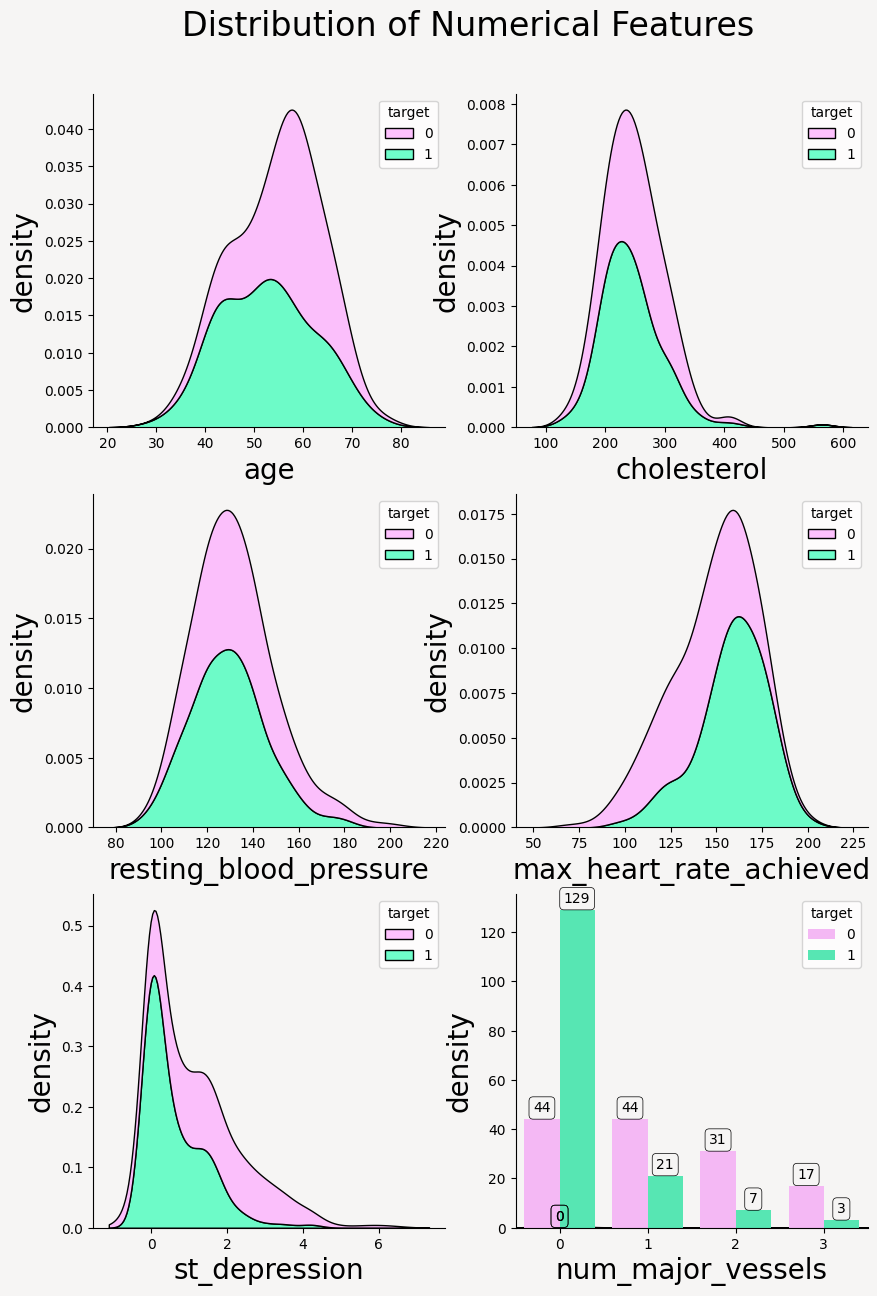

In [ ]:
L = len(num_feats)
ncol= 2
nrow= int(np.ceil(L/ncol))
#remove_last= (nrow * ncol) - L

fig, ax = plt.subplots(nrow, ncol, figsize=(10, 14),facecolor='#F6F5F4')
fig.subplots_adjust(top=0.92)

i = 1
for col in num_feats:
    plt.subplot(nrow, ncol, i, facecolor='#F6F5F4')

    ax = sns.kdeplot(data=data, x=col, hue="target", multiple="stack", palette=mypal[1::4])
    ax.set_xlabel(col, fontsize=20)
    ax.set_ylabel("density", fontsize=20)
    sns.despine(right=True)
    sns.despine(offset=0, trim=False)

    if col == 'num_major_vessels':
        sns.countplot(data=data, x=col, hue="target", palette=mypal[1::4])
        for p in ax.patches:
                height = p.get_height()
                ax.text(p.get_x()+p.get_width()/2.,height + 3,'{:1.0f}'.format((height)),ha="center",
                      bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.5))

    i = i +1
plt.suptitle('Distribution of Numerical Features' ,fontsize = 24);

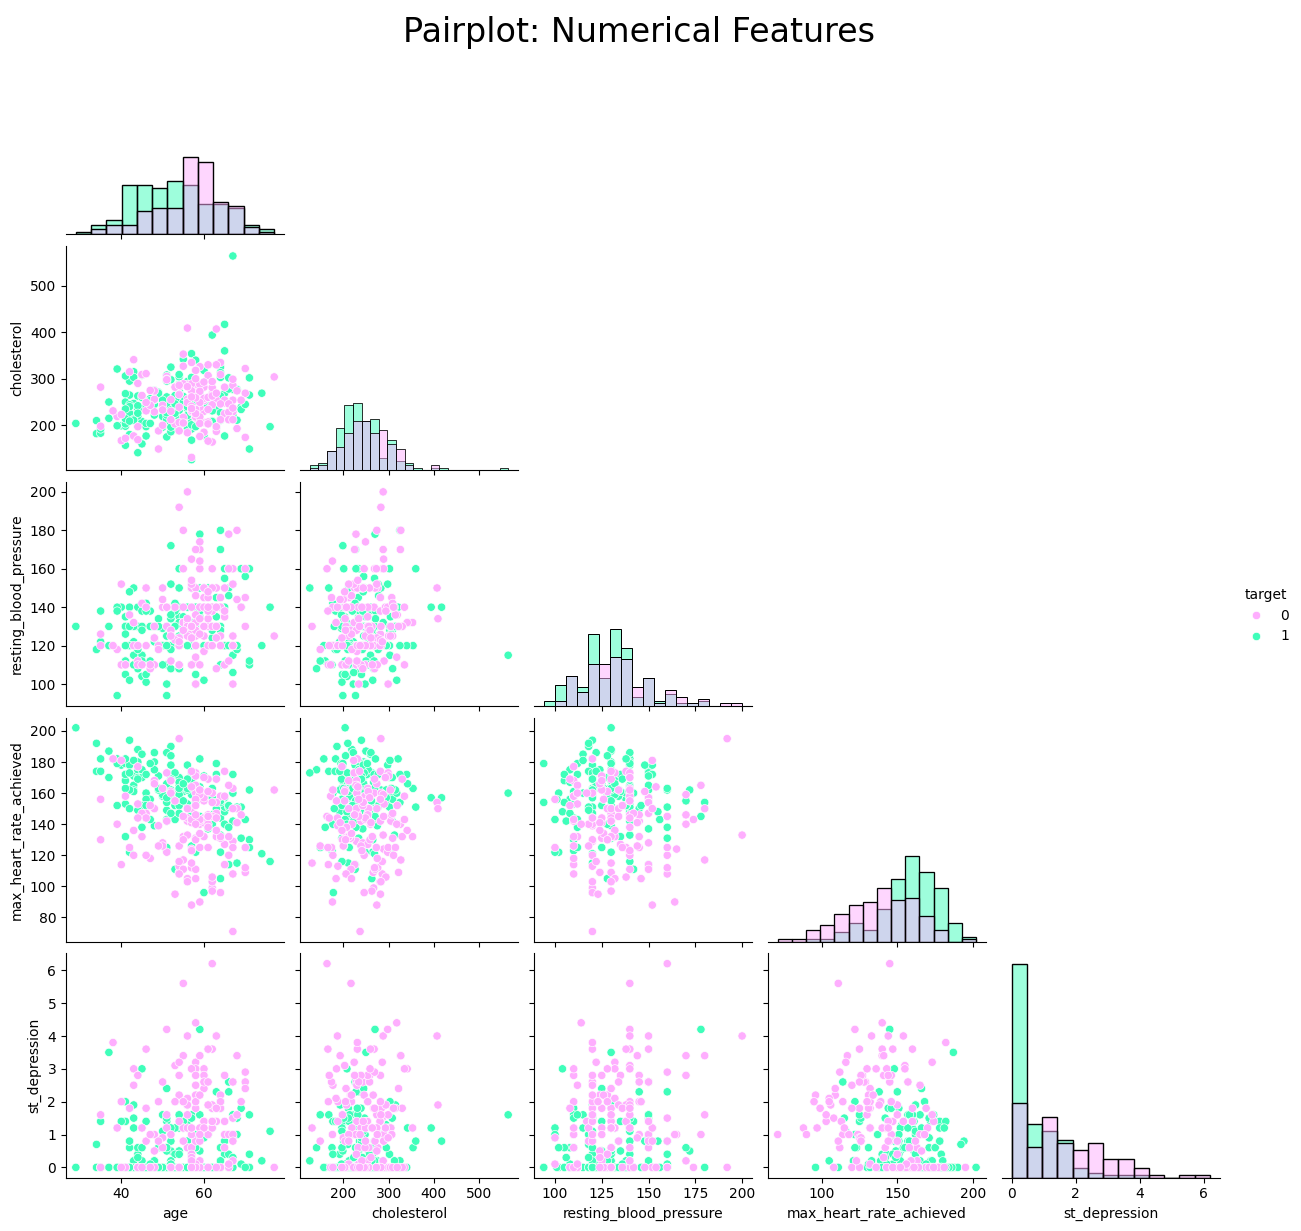

In [ ]:
_ = ['age', 'cholesterol', 'resting_blood_pressure', 'max_heart_rate_achieved', 'st_depression', 'target']
data_ = data[_]
g = sns.pairplot(data_, hue="target", corner=True, diag_kind='hist', palette=mypal[1::4]);
plt.suptitle('Pairplot: Numerical Features ' ,fontsize = 24);

Selected Features

Below are reg-plots of some selected features showing the linear relation with Age, similar to the first column in the pair-plot above. We observe that:

- Except maximum_heart_rate_achieved, the others are positively and linearly related with age (albeit a weaker relation with st_depression).
- Younger patients with higher maximum_heart_rate_achieved are more likely to have a heart condition.
- Lower st_depression regardless of age is also likely an indication of a heart disease

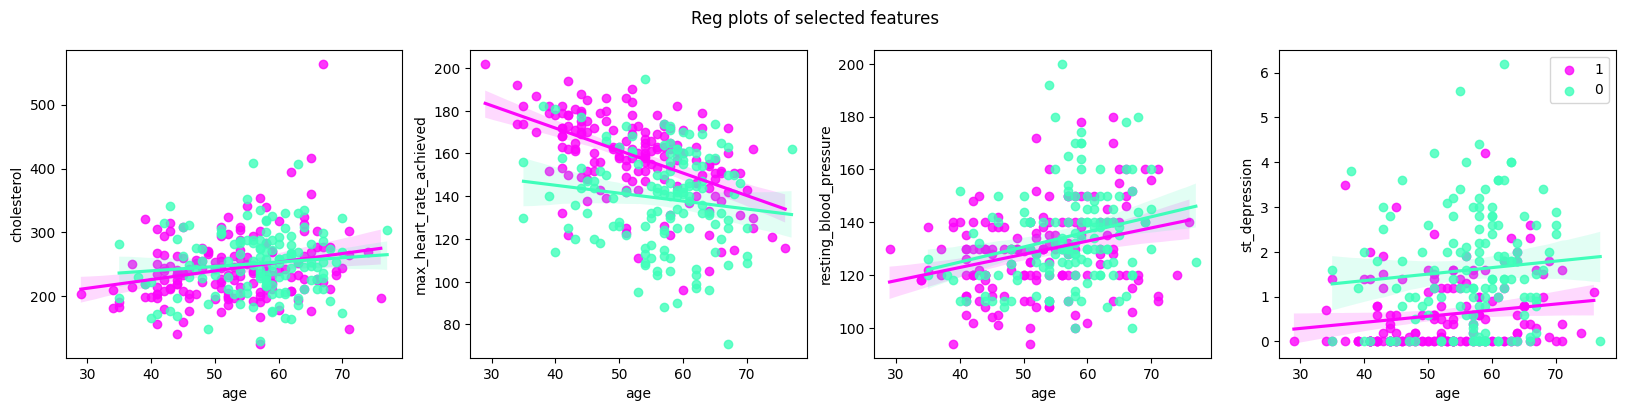

In [ ]:
fig, ax = plt.subplots(1,4, figsize=(20, 4))
sns.regplot(data=data[data['target'] ==1], x='age', y='cholesterol', ax = ax[0], color=mypal[0], label='1')
sns.regplot(data=data[data['target'] ==0], x='age', y='cholesterol', ax = ax[0], color=mypal[5], label='0')
sns.regplot(data=data[data['target'] ==1], x='age', y='max_heart_rate_achieved', ax = ax[1], color=mypal[0], label='1')
sns.regplot(data=data[data['target'] ==0], x='age', y='max_heart_rate_achieved', ax = ax[1], color=mypal[5], label='0')
sns.regplot(data=data[data['target'] ==1], x='age', y='resting_blood_pressure', ax = ax[2], color=mypal[0], label='1')
sns.regplot(data=data[data['target'] ==0], x='age', y='resting_blood_pressure', ax = ax[2], color=mypal[5], label='0')
sns.regplot(data=data[data['target'] ==1], x='age', y='st_depression', ax = ax[3], color=mypal[0], label='1')
sns.regplot(data=data[data['target'] ==0], x='age', y='st_depression', ax = ax[3], color=mypal[5], label='0')
plt.suptitle('Reg plots of selected features')
plt.legend();

1.3.3 Categorical Features

We use a count plot to visualize the different categories with respect to the target variable. Two things we could take note of are the distribution of each category in the dataset and their contribution to the probability of correct prediction of the target variable, i.e has disease (=1) or has no disease (=0). Below is the summary of the categorical features.

**Chest Pain:**

- More than 75% of the patients experience either typical angina or non-angina chest pain.
- Patients who experienced atypical angina or non-angina chest pain are more likely to have a heart disease.

**Resting Electrocardiogram:**

- Patients with Left ventricular hypertrophy are the fewest (~1.4%). The rest is almost a 50-50 split between patients with ST-T abnormality and those with normal REC tests.
- ST-T abnormality seem to have a better correlation with the target, i.e the majority of patients with this kind of REC test ended up with a heart disease.

**ST-Slope:**

- Most patients have a downsloping or flat ST-Slope of their REC test.
- downsloping ST-Slopes are a strong indication that a patient might have a heart disease.

**Thalassemia:**

- Most patients have a normal or reversable defect
- Patients who have thalassemia defects (reversable + fixed) are less likely to have a heart disease. Whereas, those with normal thalassemia are more likely to have a heart condition. Sounds not intuitive.

**Fasting blood sugar:**

- Patients with lower (less than 120mg/ml) fasting blood sugar are the majority in our dataset consisting of ~85% of the sample.
- Having lower resting blood sugar tends to increase the chances (~54%) of a heart disease.

**Exercise Induced Angina:**

- Two-third of the patients showed no exercise induced angina.
- 76% of the patients with exercise induced angina had no heart conditions. Whereas ~69% of the patients who did not experience exercise induced angina were diagnosed with heart condition.

**Sex:**
- More patients in the sample data are male.
- Females seem to suffer from heart condition more than males.

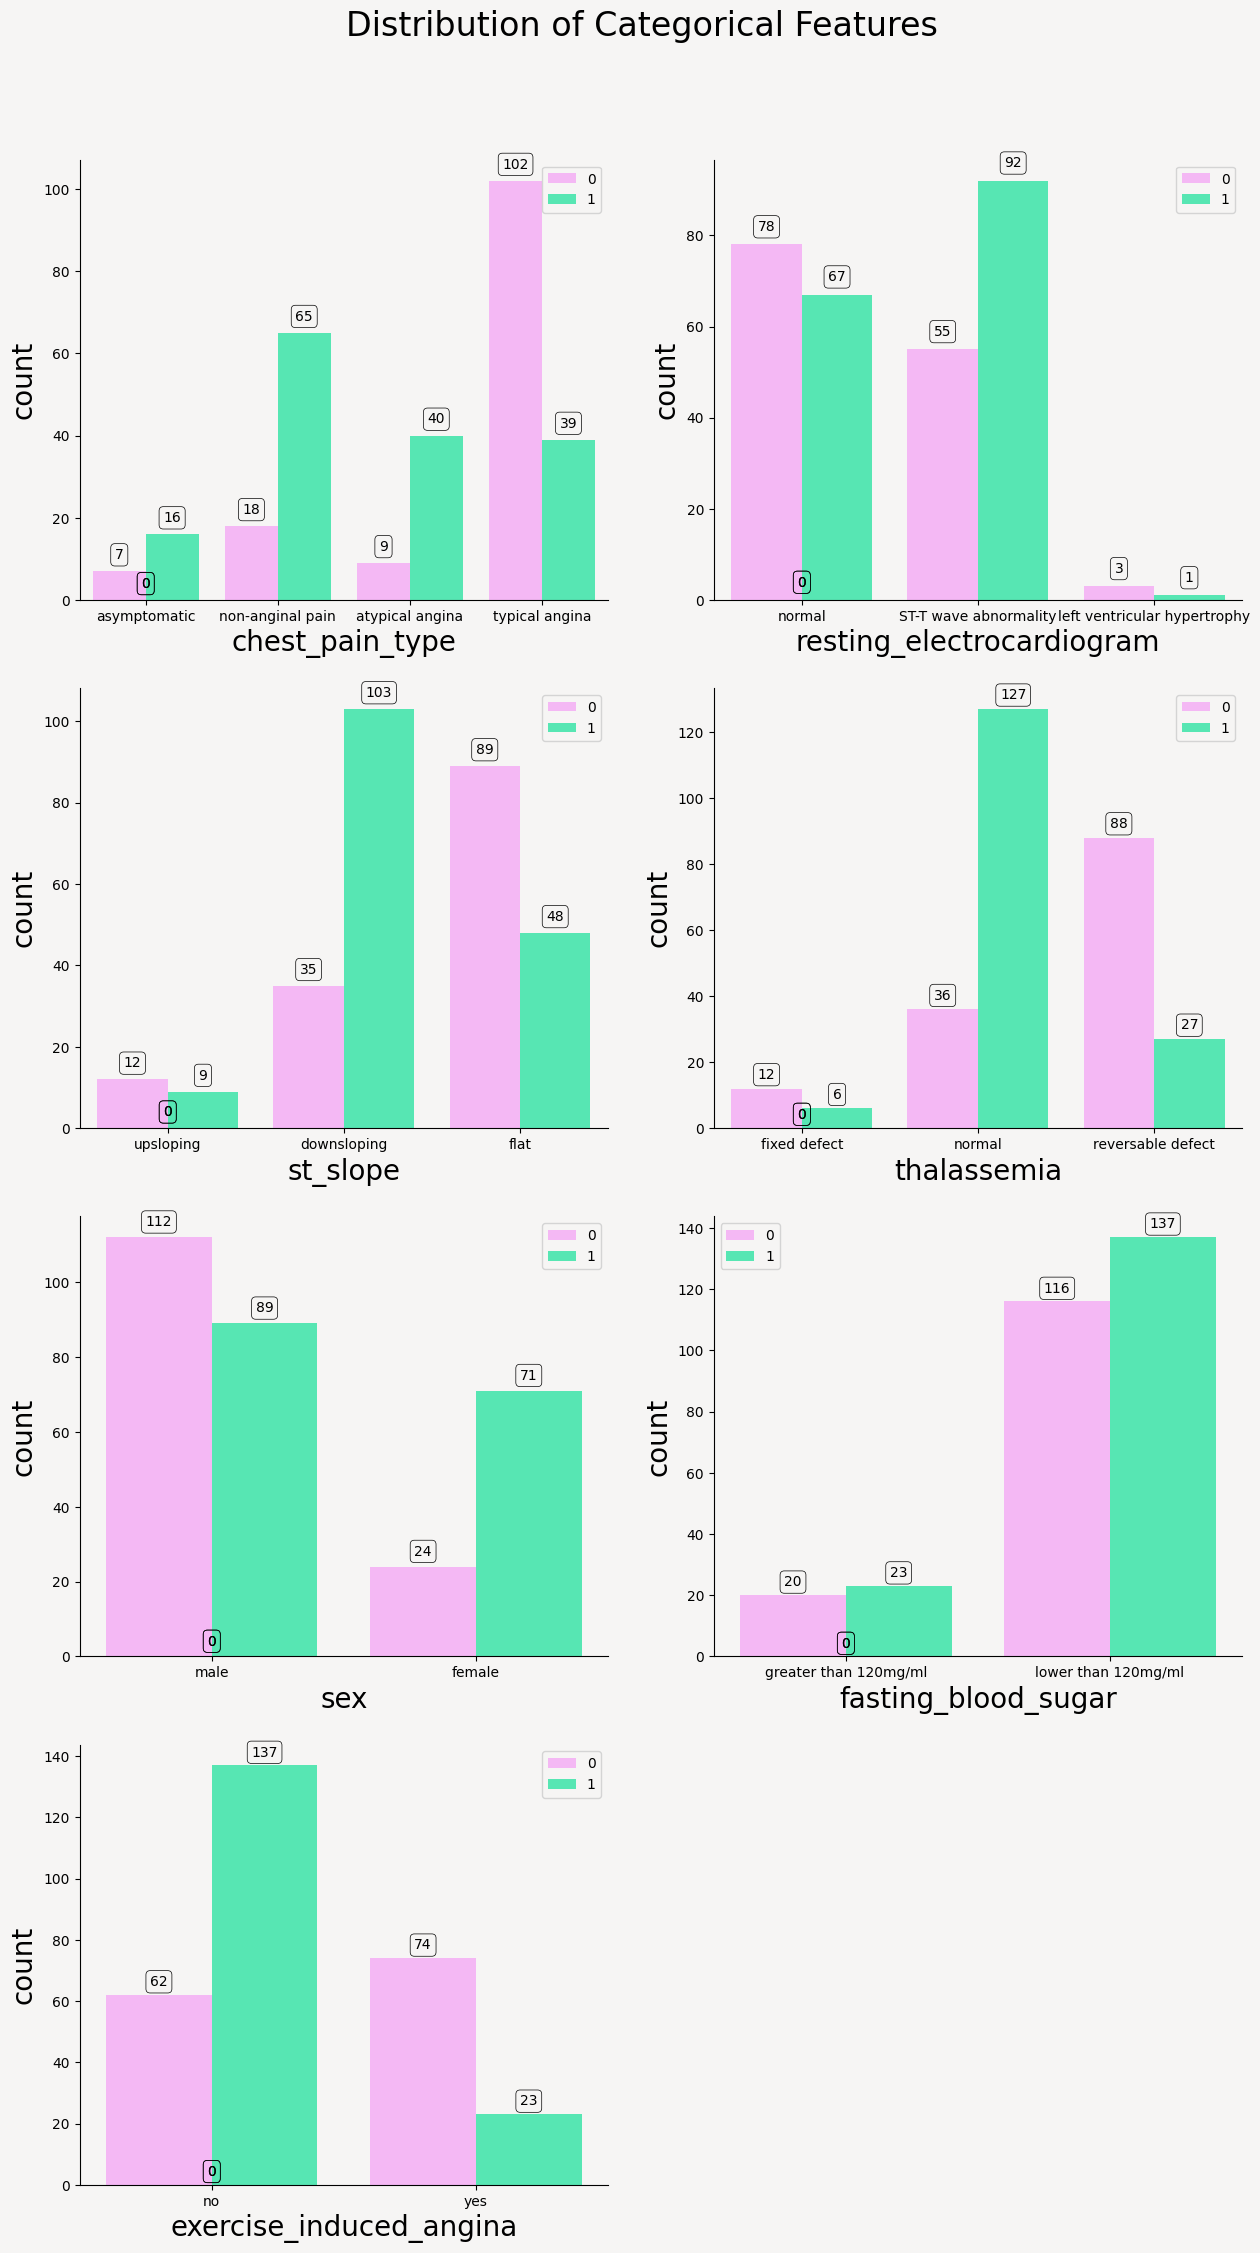

In [ ]:
def count_plot(data, cat_feats):
    L = len(cat_feats)
    ncol= 2
    nrow= int(np.ceil(L/ncol))
    remove_last= (nrow * ncol) - L

    fig, ax = plt.subplots(nrow, ncol,figsize=(15, 25), facecolor='#F6F5F4')
    fig.subplots_adjust(top=0.92)
    ax.flat[-remove_last].set_visible(False)

    i = 1
    for col in cat_feats:
        plt.subplot(nrow, ncol, i, facecolor='#F6F5F4')
        ax = sns.countplot(data=data, x=col, hue="target", palette=mypal[1::4])
        ax.set_xlabel(col, fontsize=20)
        ax.set_ylabel("count", fontsize=20)
        sns.despine(right=True)
        sns.despine(offset=0, trim=False)
        plt.legend(facecolor='#F6F5F4')

        for p in ax.patches:
            height = p.get_height()
            ax.text(p.get_x()+p.get_width()/2.,height + 3,'{:1.0f}'.format((height)),ha="center",
                  bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.5))

        i = i +1

    plt.suptitle('Distribution of Categorical Features' ,fontsize = 24)
    return 0

count_plot(data, cat_feats[0:-1]);

## 1.4 Correlation Heatmaps
Correlation heatmap is a useful tool to graphyically represent how two features are related to eachother. Depending upon the data types of the features, we need to use the appropriate correlation coefficient calculation methods. Examples are pearson's correlation coefficient, point biserial correlation, cramers'V correlation and etc.

1.4.1 Pearson's correlation

The Pearson correlation coefficient ― is a measure of linear correlation between two sets of data. It is the ratio between the covariance of two variables and the product of their standard deviations; thus it is essentially a normalised measurement of the covariance, such that the result always has a value between −1 and 1.



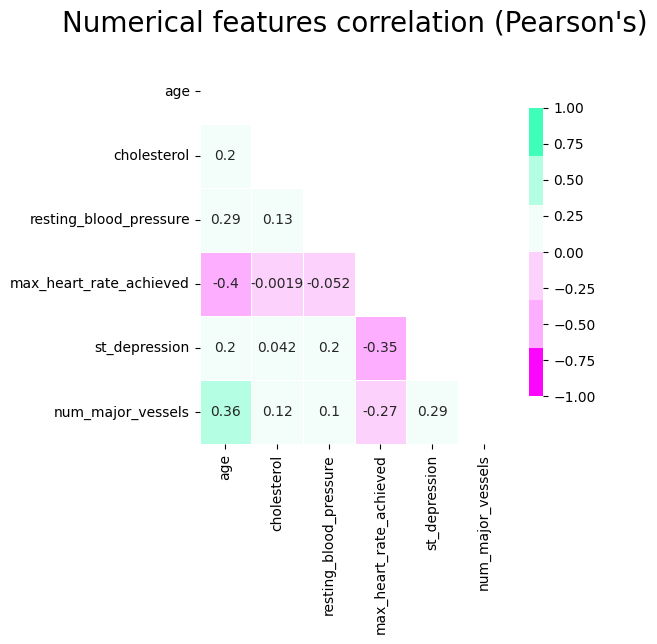

In [ ]:
df_ = data[num_feats]
corr = df_.corr(method='pearson')
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(5, 5), facecolor=None)
cmap = sns.color_palette(mypal, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1.0, vmin=-1.0, center=0, annot=True,
            square=False, linewidths=.5, cbar_kws={"shrink": 0.75})
ax.set_title("Numerical features correlation (Pearson's)", fontsize=20, y= 1.05);

1.4.2 Point biserial correlation

A point-biserial correlation is used to measure the strength and direction of the association that exists between one continuous variable and one dichotomous variable. It is a special case of the Pearson’s product-moment correlation, which is applied when you have two continuous variables, whereas in this case one of the variables is measured on a dichotomous scale

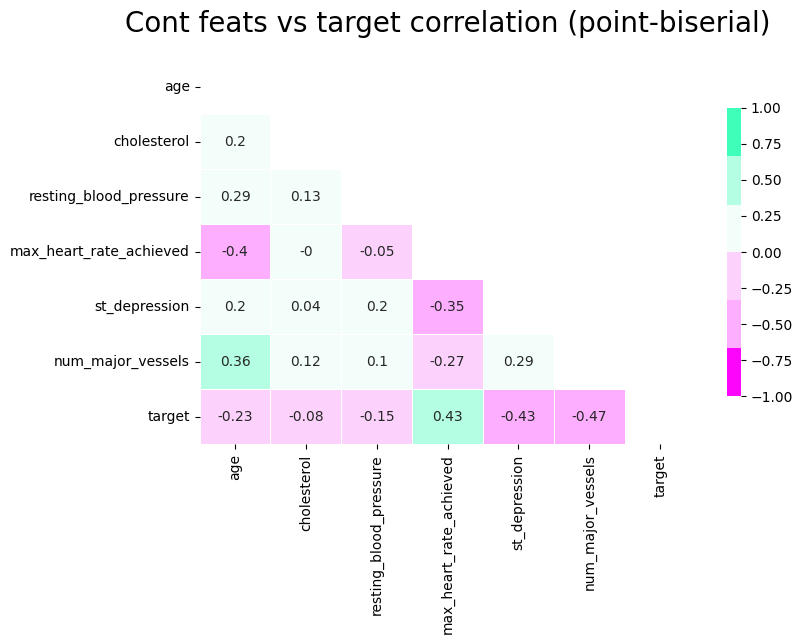

In [ ]:
feats_ = ['age', 'cholesterol', 'resting_blood_pressure', 'max_heart_rate_achieved', 'st_depression', 'num_major_vessels', 'target']

def point_biserial(x, y):
    pb = stats.pointbiserialr(x, y)
    return pb[0]

rows= []
for x in feats_:
    col = []
    for y in feats_ :
        pbs =point_biserial(data[x], data[y])
        col.append(round(pbs,2))
    rows.append(col)

pbs_results = np.array(rows)
DF = pd.DataFrame(pbs_results, columns = data[feats_].columns, index =data[feats_].columns)

mask = np.triu(np.ones_like(DF, dtype=bool))
corr = DF.mask(mask)

f, ax = plt.subplots(figsize=(8, 5), facecolor=None)
cmap = sns.color_palette(mypal, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1.0, vmin=-1, center=0, annot=True,
            square=False, linewidths=.5, cbar_kws={"shrink": 0.75})
ax.set_title("Cont feats vs target correlation (point-biserial)", fontsize=20, y= 1.05);

1.4.3 Cramer's V correlation

In statistics, Cramér's V is a measure of association between two nominal variables, giving a value between 0 and +1 (inclusive). It is based on Pearson's chi-squared statistic and was published by Harald Cramér in 1946

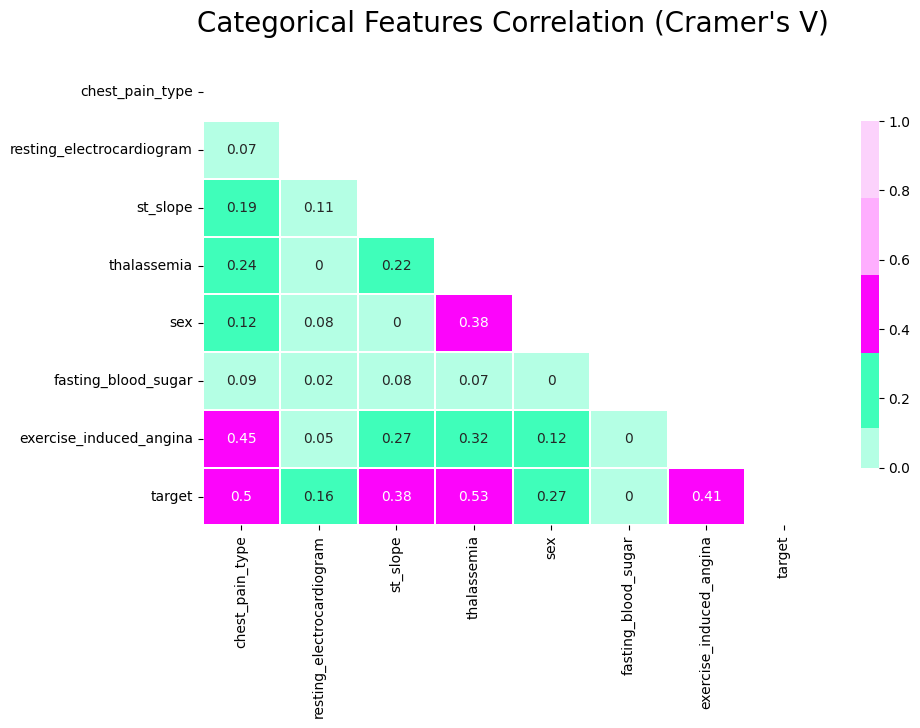

In [ ]:
# the cramers_v function is copied from https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

# calculate the correlation coefficients using the above function
data_ = data[cat_feats]
rows= []
for x in data_:
    col = []
    for y in data_ :
        cramers =cramers_v(data_[x], data_[y])
        col.append(round(cramers,2))
    rows.append(col)

cramers_results = np.array(rows)
df = pd.DataFrame(cramers_results, columns = data_.columns, index = data_.columns)

# color palette
mypal_1= ['#FC05FB', '#FEAEFE', '#FCD2FC','#F3FEFA', '#B4FFE4','#3FFEBA', '#FC05FB', '#FEAEFE', '#FCD2FC']
# plot the heat map
mask = np.triu(np.ones_like(df, dtype=bool))
corr = df.mask(mask)
f, ax = plt.subplots(figsize=(10, 6), facecolor=None)
cmap = sns.color_palette(mypal_1, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1.0, vmin=0, center=0, annot=True,
            square=False, linewidths=.01, cbar_kws={"shrink": 0.75})
ax.set_title("Categorical Features Correlation (Cramer's V)", fontsize=20, y= 1.05);

## 1.5 EDA Summary:

 **Data size:**
 - 303 rows and 14 columns (13 independent + one target variable) > later reduced to 296 after removing faulty data points!
 - Data has no missing values
 - Features (columns) data type:
- Six features are numerical
- The rest (seven features) are categorical variables

- Target variable is fairly balanced, 54% no-disease to 46% has-disease
- Correlations:
 - Correlation between features is weak at best
 - From the numerical features num_major_vessels, max_heart_rate_achieved and st_depression are reasonabily fairly correlated with the target variable at -0.47, 0.43 and -0.43 correlation coefficient respectively.
 - From the categorical features chest_pain_type, num_major_vessels, thalassemia, and exercise_induced_angina are better correlated with the target variable, thalassemia being the highest at 0.52.
 - Cholestrol (to my surprize, but what do I know?) has less correlation with heart desease.

**Takeaway:** features that have higher predictive power could be, chest_pain_type, num_major_vessels, thalassemia, exercise_induced_angina max_heart_rate_achieved and st_depression. We will see which features will appear as imporatnt by the classification models.


# 2. Predictions

Note : We have only 297 case (after data cleaning) which is a very small amount of data to do any serious prediction. Therefore, any conclusion made must be taken with cautions. This notebook is merely an excercise on binary classification algorithms.

## 2.1 Scikit Learn Classifiers

This is a binary classification problem (has-disease or no-disease cases). Scikit learn offers a wide range of classification algorithms and is often the starting point in most/traditional machine learning challenges, so we start by exploring few of the classification alorithms from the sklearn libarary such as Logistic Regression, Nearest Neighbors, Support Vectors, Nu SVC, Decision Tree, Random Forest, AdaBoost, Gradient Boosting, Naive Bayes, Linear Discriminant Analysis, Quadratic Discriminant Analysis and Neural Net. Let's first build simple models using the above mentioned ML algorithms and later we will optimize them by tuning the parameters.

In [ ]:
!pip install plot_confusion_matrix

In [ ]:
pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 3.6 MB/s eta 0:00:00


In [ ]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.svm import SVC, NuSVC
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
# from sklearn.naive_bayes import GaussianNB
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
# from sklearn.neural_network import MLPClassifier
# from sklearn.metrics import confusion_matrix, classification_report, recall_score, accuracy_score, roc_curve, roc_auc_score, ConfusionMatrixDisplay
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import LabelEncoder
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import shap

# def label_encode_cat_features(data, cat_features):
#     '''
#     Given a dataframe and its categorical features, this function returns label-encoded dataframe
#     '''

#     label_encoder = LabelEncoder()
#     data_encoded = data.copy()

#     for col in cat_features:
#         data_encoded[col] = label_encoder.fit_transform(data[col])

#     return data_encoded


# def score_summary(names, classifiers, X_train, X_val, y_train, y_val):
#     '''
#     Given a list of classifiers, this function calculates the accuracy,
#     ROC_AUC and Recall and returns the values in a dataframe
#     '''

#     cols=["Classifier", "Accuracy", "ROC_AUC", "Recall", "Precision", "F1"]
#     data_table = pd.DataFrame(columns=cols)

#     for name, clf in zip(names, classifiers):
#         clf.fit(X_train, y_train)

#         pred = clf.predict(X_val)
#         accuracy = accuracy_score(y_val, pred)

#         pred_proba = clf.predict_proba(X_val)[:, 1]

#         roc_auc = roc_auc_score(y_val, pred_proba)

#         # confusion matrix
#         cm = confusion_matrix(y_val, pred)

#         # recall: TP/(TP+FN)
#         recall = cm[1,1]/(cm[1,1] + cm[1,0])

#         # precision: TP/(TP+FP)
#         precision = cm[1,1]/(cm[1,1] + cm[0,1])

#         # F1 score
#         f1 = 2 * (precision * recall) / (precision + recall)

#         df = pd.DataFrame([[name, accuracy*100, roc_auc, recall, precision, f1]], columns=cols)
#         data_table = pd.concat([data_table, df], ignore_index=True)

#     return np.round(data_table.reset_index(drop=True), 2)


# def plot_conf_matrix(names, classifiers, X_train, X_val, y_train, y_val, nrows, ncols, fig_a, fig_b):
#     '''
#     Plots confusion matrices in subplots.

#     Args:
#         names : list of names of the classifier
#         classifiers : list of classification algorithms
#         nrows, ncols : number of rows and rows in the subplots
#         fig_a, fig_b : dimensions of the figure size
#     '''

#     fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(fig_a, fig_b))

#     i = 0
#     for clf, ax in zip(classifiers, axes.flatten()):

#         clf.fit(X_train, y_train)
#         disp = ConfusionMatrixDisplay.from_estimator(clf, X_val, y_val, ax=ax)
#         ax.title.set_text(names[i])
#         i = i + 1

#     plt.tight_layout()
#     plt.show()


# def roc_auc_curve(names, classifiers, X_train, X_val, y_train, y_val):
#     '''
#     Given a list of classifiers, this function plots the ROC curves
#     '''
#     plt.figure(figsize=(12, 8))

#     for name, clf in zip(names, classifiers):
#         clf.fit(X_train, y_train)

#         pred_proba = clf.predict_proba(X_val)[:, 1]

#         fpr, tpr, _ = roc_curve(y_val, pred_proba)
#         roc_auc = roc_auc_score(y_val, pred_proba)

#         plt.plot(fpr, tpr, lw=3, label=name + ' ROC curve (area = %0.2f)' % roc_auc)

#     plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
#     plt.xlim([0.0, 1.0])
#     plt.ylim([0.0, 1.0])
#     plt.xlabel('False Positive Rate')
#     plt.ylabel('True Positive Rate')
#     plt.title('Receiver Operating Characteristic (ROC) Curves', fontsize=20)
#     plt.legend(loc="lower right")
#     plt.show()


# # Example usage:

# # Assuming `data` is your dataframe and `cat_feats` is the list of categorical features
# cat_features = cat_feats
# data = label_encode_cat_features(data, cat_features)

# seed = 0
# test_size = 0.25

# features = data.columns[:-1]

# X = data[features]
# y = data['target']

# X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=test_size, random_state=seed)


# # Classifier algorithms with default parameters

# names = [
#     'Logistic Regression',
#     'Nearest Neighbors',
#     'Support Vectors',
#     'Nu SVC',
#     'Decision Tree',
#     'Random Forest',
#     'AdaBoost',
#     'Gradient Boosting',
#     'Naive Bayes',
#     'Linear DA',
#     'Quadratic DA',
#     'Neural Net'
# ]

# classifiers = [
#     LogisticRegression(solver="liblinear", random_state=seed),
#     KNeighborsClassifier(2),
#     SVC(probability=True, random_state=seed),
#     NuSVC(probability=True, random_state=seed),
#     DecisionTreeClassifier(random_state=seed),
#     RandomForestClassifier(random_state=seed),
#     AdaBoostClassifier(random_state=seed),
#     GradientBoostingClassifier(random_state=seed),
#     GaussianNB(),
#     LinearDiscriminantAnalysis(),
#     QuadraticDiscriminantAnalysis(),
#     MLPClassifier(random_state=seed),
# ]

# # Calculate and display scores
# scores = score_summary(names, classifiers, X_train, X_val, y_train, y_val)
# print(scores)

# # Plot confusion matrices
# plot_conf_matrix(names, classifiers, X_train, X_val, y_train, y_val, nrows=3, ncols=4, fig_a=20, fig_b=15)

# # Plot ROC curves
# roc_auc_curve(names, classifiers, X_train, X_val, y_train, y_val)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, classification_report,ConfusionMatrixDisplay
from sklearn.metrics import recall_score, accuracy_score, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder
import shap

In [ ]:
def label_encode_cat_features(data, cat_features):
    '''
    Given a dataframe and its categorical features, this function returns label-encoded dataframe
    '''

    label_encoder = LabelEncoder()
    data_encoded = data.copy()

    for col in cat_features:
        data_encoded[col] = label_encoder.fit_transform(data[col])

    return data_encoded


def score_summary(names, classifiers, X_train, X_val, y_train, y_val):
    '''
    Given a list of classifiers, this function calculates the accuracy,
    ROC_AUC and Recall and returns the values in a dataframe
    '''

    cols=["Classifier", "Accuracy", "ROC_AUC", "Recall", "Precision", "F1"]
    data_table = pd.DataFrame(columns=cols)

    for name, clf in zip(names, classifiers):
        clf.fit(X_train, y_train)

        pred = clf.predict(X_val)
        accuracy = accuracy_score(y_val, pred)

        pred_proba = clf.predict_proba(X_val)[:, 1]

        roc_auc = roc_auc_score(y_val, pred_proba)

        # confusion matrix
        cm = confusion_matrix(y_val, pred)

        # recall: TP/(TP+FN)
        recall = cm[1,1]/(cm[1,1] + cm[1,0])

        # precision: TP/(TP+FP)
        precision = cm[1,1]/(cm[1,1] + cm[0,1])

        # F1 score
        f1 = 2 * (precision * recall) / (precision + recall)

        df = pd.DataFrame([[name, accuracy*100, roc_auc, recall, precision, f1]], columns=cols)
        data_table = pd.concat([data_table, df], ignore_index=True)

    return np.round(data_table.reset_index(drop=True), 2)


def plot_conf_matrix(names, classifiers, X_train, X_val, y_train, y_val, nrows, ncols, fig_a, fig_b):
    '''
    Plots confusion matrices in subplots.

    Args:
        names : list of names of the classifier
        classifiers : list of classification algorithms
        nrows, ncols : number of rows and rows in the subplots
        fig_a, fig_b : dimensions of the figure size
    '''

    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(fig_a, fig_b))

    i = 0
    for clf, ax in zip(classifiers, axes.flatten()):

        clf.fit(X_train, y_train)
        disp = ConfusionMatrixDisplay.from_estimator(clf, X_val, y_val, ax=ax)
        ax.title.set_text(names[i])
        i = i + 1

    plt.tight_layout()
    plt.show()


def roc_auc_curve(names, classifiers, X_train, X_val, y_train, y_val):
    '''
    Given a list of classifiers, this function plots the ROC curves
    '''
    plt.figure(figsize=(12, 8))

    for name, clf in zip(names, classifiers):
        clf.fit(X_train, y_train)

        pred_proba = clf.predict_proba(X_val)[:, 1]

        fpr, tpr, _ = roc_curve(y_val, pred_proba)
        roc_auc = roc_auc_score(y_val, pred_proba)

        plt.plot(fpr, tpr, lw=3, label=name + ' ROC curve (area = %0.2f)' % roc_auc)

    plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curves', fontsize=20)
    plt.legend(loc="lower right")
    plt.show()


In [ ]:
# Example usage:

# Assuming `data` is your dataframe and `cat_feats` is the list of categorical features
cat_features = cat_feats
data = label_encode_cat_features(data, cat_features)

seed = 0
test_size = 0.25

features = data.columns[:-1]

X = data[features]
y = data['target']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=test_size, random_state=seed)


# Classifier algorithms with default parameters

names = [
    'Logistic Regression',
    'Nearest Neighbors',
    'Support Vectors',
    'Nu SVC',
    'Decision Tree',
    'Random Forest',
    'AdaBoost',
    'Gradient Boosting',
    'Naive Bayes',
    'Linear DA',
    'Quadratic DA',
    'Neural Net'
]

classifiers = [
    LogisticRegression(solver="liblinear", random_state=seed),
    KNeighborsClassifier(2),
    SVC(probability=True, random_state=seed),
    NuSVC(probability=True, random_state=seed),
    DecisionTreeClassifier(random_state=seed),
    RandomForestClassifier(random_state=seed),
    AdaBoostClassifier(random_state=seed),
    GradientBoostingClassifier(random_state=seed),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    MLPClassifier(random_state=seed),
]


2.1.1 Performance metric

There are several metrics that can be used to gauge the performance of a given classification algorithm. The choice of the 'appropriate' metrics is then dependent on the type of problem we are dealing with. There are case where, for example, accuracy can be the right choice and in some other case a recall or precision could be more fitting to the purpose. Since we are dealing with medical case (classify if a case is positive for heart disease or not), we could use recall (true positive rate or sensitivity) as performance metrics to choose our classifier. Note here that we do not want to classify positive (has disease) cases as negative (no disease).

**Confusion matrix :** A confusion matrix (aka an error matrix) is a specific table layout that allows visualization of the performance of a supervised learning algorithm. Each row of the matrix represents the instances in an actual class while each column represents the instances in a predicted class [wiki]. The table below is an example of a confusion matrix for a binary classification from which other terminologies/metric can be derived. Some of the metrics are described below.

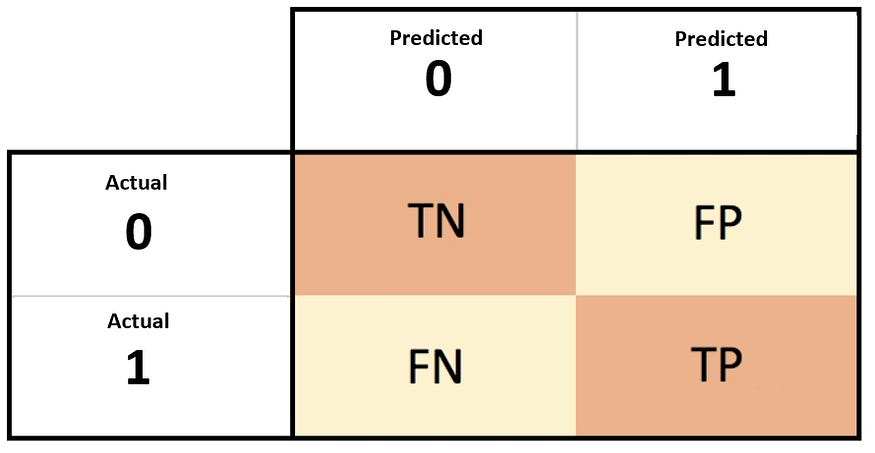


Key:

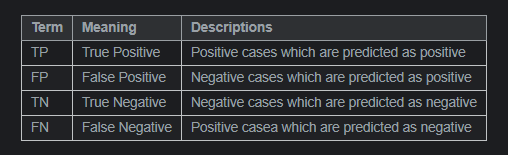

**Accuracy :** Measures how many of the cases are correctly identified/predicted by the model, i.e correct prediction divided by the total sample size.

T
P
+
T
N/
T
P
+
T
N
+
F
P
+
F
N

**Recall:** Measures the rate of true positives, i.e how many of the actual positive cases are identified/predicted as positive by the model.

T
P/
(
T
P
+
F
N
)

**Precision:** Measures how many of the positive predicted cases are actually positive.

T
P/
(
T
P
+
F
P
)

**F1-Score :** Combines the precision and recall of the model and it is defined as the harmonic mean of the model’s precision and recall.

2(
r
e
c
a
l
l
∗
p
r
e
c
i
s
i
o
n/
r
e
c
a
l
l
+
p
r
e
c
i
s
i
o
n)

**ROC curves :** A receiver operating characteristic (ROC) curve, is a graphical plot which illustrates the performance of a binary classification algorithm as a function of ture positive rate and false positive rate.

2.1.2 Performance metrics summary table

             Classifier  Accuracy  ROC_AUC  Recall  Precision    F1
0   Logistic Regression     86.49     0.92    0.91       0.82  0.86
1     Nearest Neighbors     55.41     0.60    0.31       0.55  0.40
2       Support Vectors     64.86     0.80    0.89       0.58  0.70
3                Nu SVC     81.08     0.91    0.91       0.74  0.82
4         Decision Tree     82.43     0.82    0.83       0.81  0.82
5         Random Forest     83.78     0.92    0.83       0.83  0.83
6              AdaBoost     82.43     0.86    0.91       0.76  0.83
7     Gradient Boosting     82.43     0.90    0.89       0.78  0.83
8           Naive Bayes     82.43     0.92    0.86       0.79  0.82
9             Linear DA     85.14     0.92    0.89       0.82  0.85
10         Quadratic DA     85.14     0.90    0.83       0.85  0.84
11           Neural Net     78.38     0.88    0.94       0.70  0.80


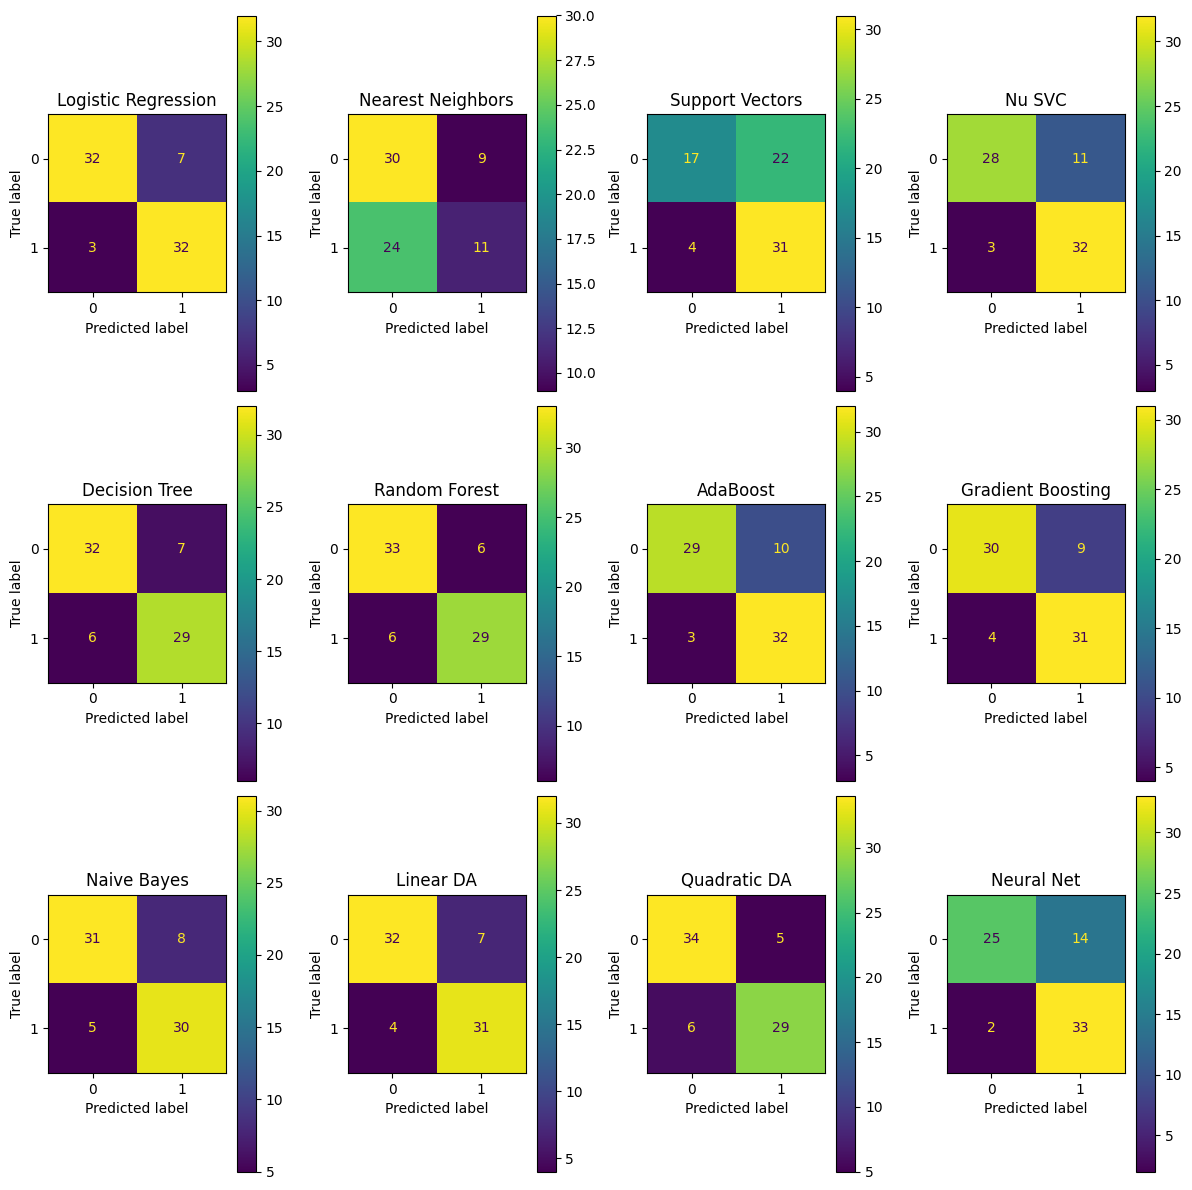

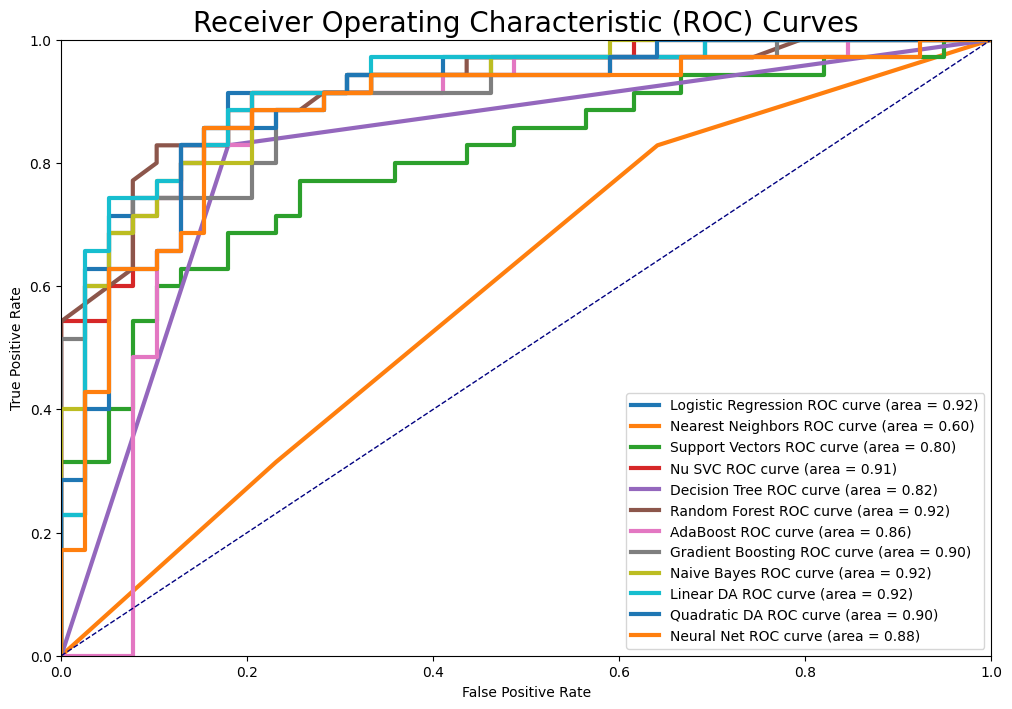

In [ ]:
# Calculate and display scores
scores = score_summary(names, classifiers, X_train, X_val, y_train, y_val)
print(scores)

# Plot confusion matrices
plot_conf_matrix(names, classifiers, X_train, X_val, y_train, y_val, nrows=3, ncols=4, fig_a=12, fig_b=12)

# Plot ROC curves
roc_auc_curve(names, classifiers, X_train, X_val, y_train, y_val)

Now we have seen all the performance metrics of the classifiers, it is decision time for us to choose the best possible classifier algorithm. Based on precision LR ranks first (86%); whereas if we see the recall, Neural Nets ranks first with 94%. In the case of precision, QDA ranks first with 85%. So which one to choose? The F1-score can give us a balance between recall and precision. LR happens to have the best F1-score so we choose Logistic Regression as our best classifier.

**Note:** If I were consulting a clinic doing a heart disease screening test, I would like to strike a perfect balance between precision and recall (I don't want the clinic to risk their reputation of by handing out too many false positive result but all without risking their clients' health by predicting too many false negatives). Therefore, I would advice them to choose the model which gives a higher F1-score, i.e the Logistic regression model.

**2.1.5 Parameter Tuning (RandomizedSearch):**
 LogisticRegression
So chosen our best classifier, the Logistic regression model. However, this was achieved with default parameters. The intuition is that we could further improve our model with tuned parameters. Let's see if could achieve that using the scikit-learn RandomizedSearch algorithm.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from sklearn.model_selection import RepeatedStratifiedKFold


lr = LogisticRegression(tol=1e-4, max_iter=1000, random_state=seed)

space = dict(C=uniform(loc=0, scale=5),
                     penalty=['l2', 'l1'],
                     solver= ['liblinear'])

search = RandomizedSearchCV(lr,
                         space,
                         random_state=seed,
                         cv = 5,
                         scoring='f1')

rand_search = search.fit(X_train, y_train)

print('Best Hyperparameters: %s' % rand_search.best_params_)

Best Hyperparameters: {'C': 0.2835648865872159, 'penalty': 'l2', 'solver': 'liblinear'}


In [ ]:
params = rand_search.best_params_
lr = LogisticRegression(**params)
lr.fit(X_train, y_train)
print(classification_report(y_val, lr.predict(X_val)))

              precision    recall  f1-score   support

           0       0.91      0.82      0.86        39
           1       0.82      0.91      0.86        35

    accuracy                           0.86        74
   macro avg       0.87      0.87      0.86        74
weighted avg       0.87      0.86      0.86        74



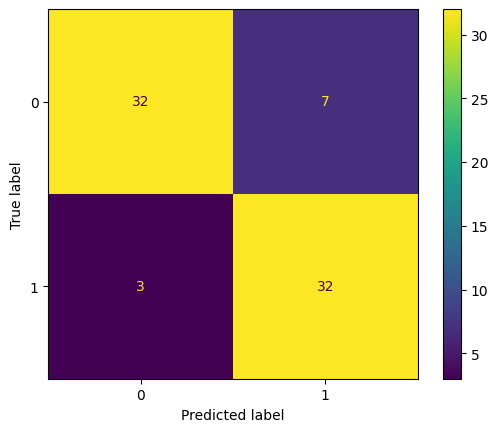

In [ ]:
ConfusionMatrixDisplay.from_estimator(lr, X_val, y_val)

Remark : It turns out that our base model (default params) is not bad at all. Parameter tuning did not help to further increase the performance.

## 2.2 Catboost, Lgbm and Xgboost

In the above section (&&2.1) we have seen classifiers out of the scikit-learn library. Now we will try the modern (boosted trees) ML algorithms such as the catboost, xgboost and lgbm. They are optimized machine learning algorithms based on the gradient-boosting technique. Depending on the problem at hand, one algorithm is may be better suited than others. For detailed info one can easily refer to their documentations.

In [ ]:
!pip install catboost xgboost lightgbm
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

names_boost =[
    'Catboost',
    'xgbbost',
    'light GBM'
]
classifiers_boost = [
    CatBoostClassifier(random_state=seed, verbose=0),
    XGBClassifier(objective= 'binary:logistic', random_state=seed),
    LGBMClassifier(random_state=seed)
   ]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 7.7 MB/s eta 0:00:00


2.2.1 Performance metrics summary table

In [ ]:
scores_boost = score_summary(names_boost, classifiers_boost, X_train, X_val, y_train, y_val)
print(scores_boost)

[LightGBM] [Info] Number of positive: 125, number of negative: 97
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000276 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 229
[LightGBM] [Info] Number of data points in the train set: 222, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.563063 -> initscore=0.253603
[LightGBM] [Info] Start training from score 0.253603
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[L

In [ ]:
scores_boost.sort_values(by='Accuracy', ascending=False)\
    .style.background_gradient(cmap='coolwarm')\
    .bar(subset=["ROC_AUC"]
1    xgbbost     79.73     0.91    0.83       0.76  0.79
2  light GBM     82.43     0.91    0.86       0.79  0., color='lightseagreen')\
    .bar(subset=["Recall"], color='lightseagreen')\
    .bar(subset=["Precision"], color='lightseagreen')\
    .bar(subset=["F1"], color='lightseagreen')

,Classifier,Accuracy,ROC_AUC,Recall,Precision,F1
0,Catboost,83.780000,0.920000,0.860000,0.810000,0.830000
2,light GBM,82.430000,0.910000,0.860000,0.790000,0.820000
1,xgbbost,79.730000,0.910000,0.830000,0.760000,0.790000


2.2.2 Confusion matrix

[LightGBM] [Info] Number of positive: 125, number of negative: 97
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000072 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 229
[LightGBM] [Info] Number of data points in the train set: 222, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.563063 -> initscore=0.253603
[LightGBM] [Info] Start training from score 0.253603
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[L

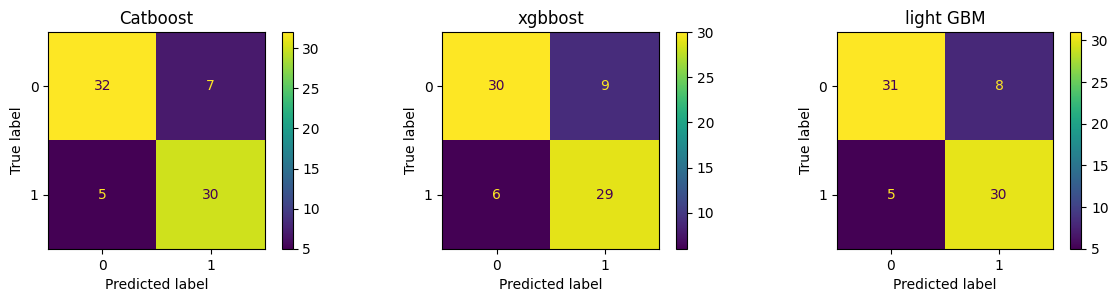

In [ ]:
plot_conf_matrix(names_boost,classifiers_boost,X_train, X_val, y_train,y_val,nrows=1, ncols=3, fig_a=12, fig_b=3)

In [ ]:
from sklearn.model_selection import GridSearchCV
rs_params = {
    'num_leaves': [20, 100],
    'max_depth': [5, 15],
    'min_data_in_leaf': [80, 120],
}
rs_cv = GridSearchCV(estimator=LGBMClassifier(random_state=seed, verbose=-1),
                           param_grid=rs_params,
                           cv = 5)

rs_cv.fit(X_train, y_train)
params = rs_cv.best_params_
params

{'max_depth': 5, 'min_data_in_leaf': 80, 'num_leaves': 20}

In [ ]:
lgbm = LGBMClassifier(**params)

lgbm.fit(X_train, y_train,
         eval_set=(X_val, y_val)
)

print(classification_report(y_val, lgbm.predict(X_val)))

[LightGBM] [Warning] min_data_in_leaf is set=80, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=80
[LightGBM] [Warning] min_data_in_leaf is set=80, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=80
[LightGBM] [Info] Number of positive: 125, number of negative: 97
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000080 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 220
[LightGBM] [Info] Number of data points in the train set: 222, number of used features: 9
[LightGBM] [Warning] min_data_in_leaf is set=80, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=80
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.563063 -> initscore=0.253603
[LightGBM] [Info] Start training from score 0.253603
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

[LightGBM] [Warning] min_data_in_leaf is set=80, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=80


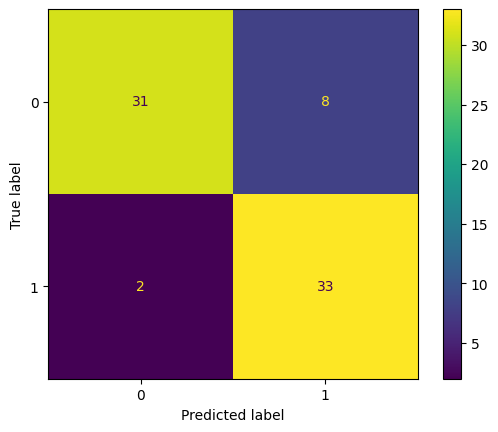

In [ ]:
ConfusionMatrixDisplay.from_estimator(lgbm, X_val, y_val);

Remark: In this case (Lgbm) hyper-parameter tuning gave better results than the base model. We have increased the recall value from 86% to 94%. Which means we have decrease the rate of false negatives from 5 cases to 2 in our validation set and we have also decreased the false positive cases by 1. Marginal but we will take every percentage point we can get.

## 2.3 Model Explainablity

One of the challenges of a machine leaning project is explaining the model's prediction. A model might consider some features more important than other for its prediction. Another model might weigh other features as more important. Permutation importance and SHAP are two methods one can use to understand which features were selected to have the most impact on our model's prediction.

2.3.1 Permutation importance:

The permutation importance is defined to be the decrease in a model score when a single feature value is randomly shuffled. The procedure breaks the relationship between the feature and the target, thus the drop in the model score is indicative of how much the model depends on the feature [3]. In other words, permutation importance tell us what features have the biggest impact on our model predictions.

In [ ]:
!pip install eli5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 1.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107720 sha256=c8261f9873b049152b23fb9024c265951a60add3f3d37df293b0b0798872e113
  Stored in directory: /root/.cache/pip/wheels/b8/58/ef/2cf4c306898c2338d51540e0922c8e0d6028e07007085c0004
Successfully built eli5


In [ ]:
import eli5
from eli5.sklearn import PermutationImportance

perm_imp = PermutationImportance(lgbm, random_state=seed).fit(X_train, y_train)
eli5.show_weights(perm_imp, feature_names = X_val.columns.tolist())

[LightGBM] [Warning] min_data_in_leaf is set=80, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=80
[LightGBM] [Warning] min_data_in_leaf is set=80, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=80
[LightGBM] [Warning] min_data_in_leaf is set=80, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=80
[LightGBM] [Warning] min_data_in_leaf is set=80, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=80
[LightGBM] [Warning] min_data_in_leaf is set=80, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=80
[LightGBM] [Warning] min_data_in_leaf is set=80, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=80
[LightGBM] [Warning] min_data_in_leaf is set=80, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=80
[LightGBM] [Warning] min_data_in_leaf is set=80, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=80
[LightGBM] [Warning] min

Weight,Feature
0.0901 ± 0.0127,num_major_vessels
0.0730 ± 0.0276,chest_pain_type
0.0288 ± 0.0340,st_slope
0.0099 ± 0.0175,max_heart_rate_achieved
0.0054 ± 0.0067,st_depression
0 ± 0.0000,thalassemia
0 ± 0.0000,exercise_induced_angina
0 ± 0.0000,resting_electrocardiogram
0 ± 0.0000,fasting_blood_sugar
0 ± 0.0000,resting_blood_pressure


2.3.2 SHAP:

SHAP, a short name for SHapely Additive ExPlanations, is a method used to explain the output of a machine learning model. It connects optimal credit allocation with local explanations using the classic Shapley values from game theory and their related extensions [5]. SHAP has a rich functionality (methods) by which we can visualize/interpret the output of our models. Below we use the shap.summary_plot() to identify the impact each feature has on the predicted output.

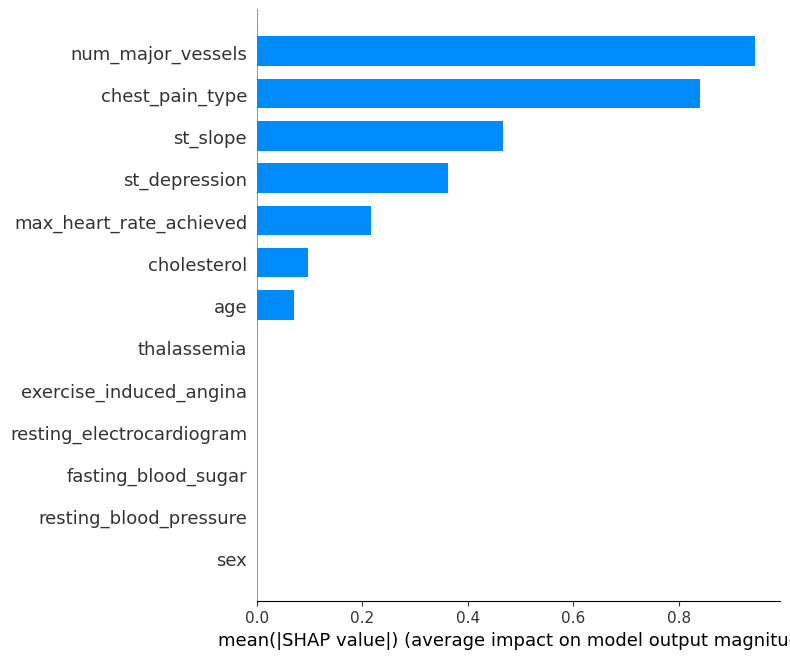

In [ ]:
import shap
shap.initjs()
explainer = shap.TreeExplainer(lgbm)
shap_values = explainer.shap_values(X_val)
shap.summary_plot(shap_values, X_val,
                  feature_names=features,
                  plot_type="bar" ,
                 )

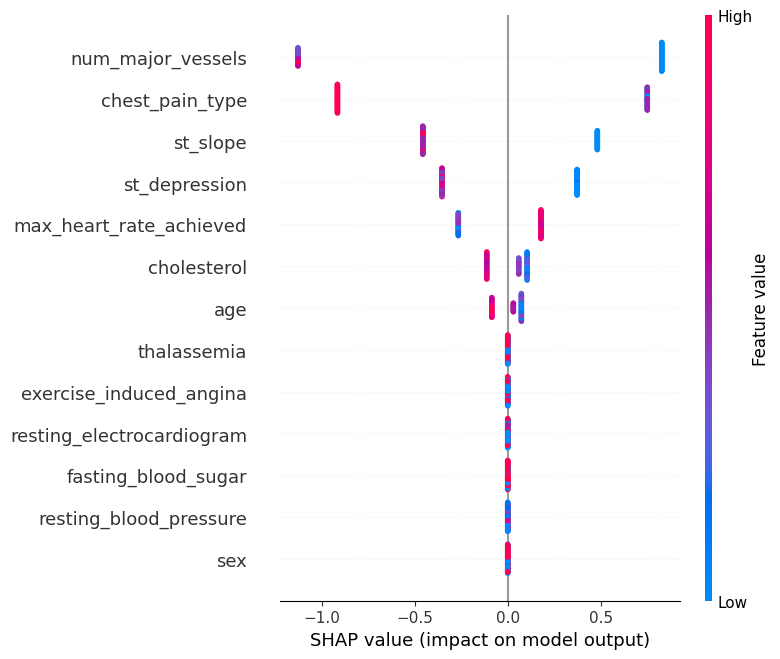

In [ ]:
import shap
shap.initjs()
explainer = shap.TreeExplainer(lgbm)
shap_values = explainer.shap_values(X_val)
shap.summary_plot(shap_values, X_val,
                  feature_names=features,
                  plot_type="dot" ,
                 )


# 3. Concluding Remark

At the start of this notebook, we laid out what we wanted to do with this project; to explore the heart disease dataset (EDA) and practice binary classification (modeling). In part one (EDA) we did explore the dataset, did a sanity check and removed some 'faulty' data and other pre-processing. We also tried to identify correlation between features and also with the target variable. In part two we practiced how to set-up binary classifiers; first starting with base models and finally arriving at our best model via hyper-parameter tuning. Some of the highlights are summarized below.



- Our best model happens to be LGBM classifier (tuned with randomizedSearch)
- According to both eli5 permutation importance and SHAP the three most important features of the model are num_major_vessels, chest_pain_type, and st_slope. These features are also among better correlated features from our EDA.
- Contrary to my intuition cholesterol happens to be not an important feature for the model (both eli5 and SHAP did not pick this feature as important).
- Although it is not shown in this notebook, varying the test/train ratio resulted in different performance metrics for the classifiers we have on our list. So if you change the ratio you might get different results.



In [ ]:
# Save your models and objects
joblib.dump(lr, 'logistic_regression_model.joblib')
joblib.dump(lgbm, 'lightgbm_model.joblib')
joblib.dump(cat_features, 'cat_features.joblib')
joblib.dump(features, 'features.joblib')

['features.joblib']